# Convolutional Neural Network (CNN)

### Import TensorFlow

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.models import Sequential
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
device = tf.config.experimental.list_physical_devices('GPU')
device = 'GPU'

### Download and prepare the CIFAR10 dataset


Bộ dữ liệu CIFAR10 chứa 60.000 hình ảnh màu trong 10 lớp, với 60000 hình ảnh trong mỗi lớp. Bộ dữ liệu được chia thành 50000 hình ảnh train và 10000 hình ảnh test.

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

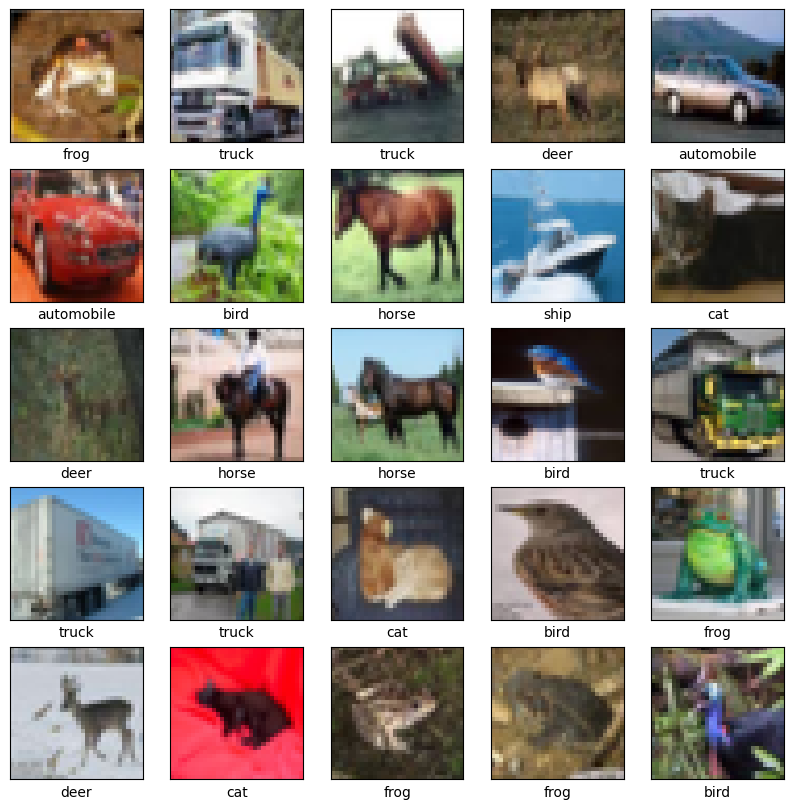

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

**Xác định cơ sở tích chập bằng cách sử dụng một mẫu chung các lớp Conv2D và MaxPooling2D.**

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

### Add Dense layers on top

Đưa tensor đầu ra cuối cùng từ cơ sở tích chập (có hình (4, 4, 64)) vào một hoặc nhiều lớp Dense để thực hiện phân loại. Output 3D thành 1D

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Hoàn chỉnh của mô hình:

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Output (4, 4, 64)  thành các vectơ có hình dạng (1024) trước khi đi qua hai lớp Dense.

### Compile and train the model

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 72s 45ms/step - loss: 1.5024 - accuracy: 0.4561 - val_loss: 1.2574 - val_accuracy: 0.5499
Epoch 2/20
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1620 - accuracy: 0.5874 - val_loss: 1.0664 - val_accuracy: 0.6257
Epoch 3/20
1563/1563 [==============================] - 71s 46ms/step - loss: 1.0221 - accuracy: 0.6416 - val_loss: 1.0101 - val_accuracy: 0.6426
Epoch 4/20
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9281 - accuracy: 0.6758 - val_loss: 0.9699 - val_accuracy: 0.6630
Epoch 5/20
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8597 - accuracy: 0.6989 - val_loss: 0.9383 - val_accuracy: 0.6772
Epoch 6/20
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8004 - accuracy: 0.7219 - val_loss: 0.9562 - val_accuracy: 0.6767
Epoch 7/20
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7474 - accuracy: 0.7380 - val_loss: 0.8897 -

### Evaluate the model

313/313 - 3s - loss: 1.1495 - accuracy: 0.6943 - 3s/epoch - 11ms/step


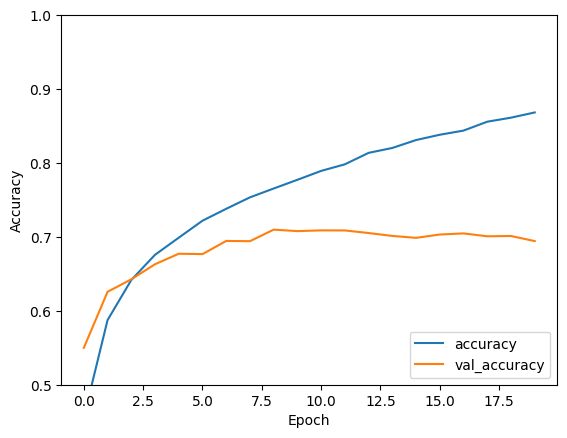

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

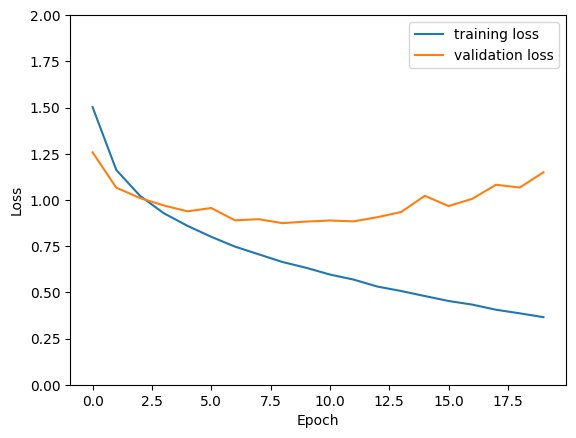

In [28]:

# Vẽ sơ đồ loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])  # Giả sử loss nằm trong khoảng từ 0 đến 1, bạn có thể điều chỉnh khoảng này tùy thuộc vào giá trị cụ thể của loss
plt.legend(loc='upper right')
plt.show()


In [13]:
print(test_acc)
train_images.shape

0.6942999958992004


(50000, 32, 32, 3)

In [14]:
# Lưu mô hình
import os
model.save('my_model.h5')
model_path = os.path.join(os.getcwd(), 'my_model.h5')
model = tf.keras.models.load_model(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


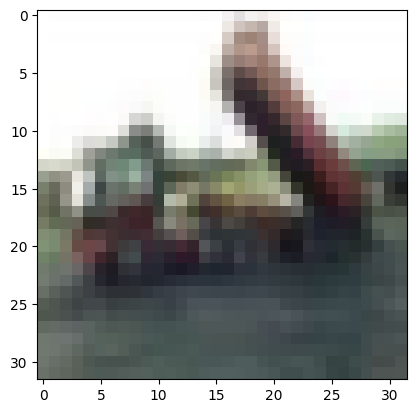

1/1 [==============================] - 0s 149ms/step
Predicted Label: 1


In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
#class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
image_index = 2
selected_image = train_images[image_index]

# Hiển thị ảnh (tùy chọn)
import matplotlib.pyplot as plt
plt.imshow(selected_image)
plt.show()

img_array = preprocess_input(np.expand_dims(selected_image, axis=0))
model_path = '/content/my_model.h5'
model = tf.keras.models.load_model(model_path)

# Dự đoán
predictions = model.predict(img_array)
predicted_label = np.argmax(predictions)
print("Predicted Label:", predicted_label)

# **Autoencoder**
##**Load and prepare the dataset**

In [25]:
# preprocessing function
def map_image(image, label):
  image = tf.cast(image, dtype=tf.float32)
  image = image / 255.0

  return image, image # dataset label is not used. replaced with the same image input.

# parameters
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('cifar10', as_supervised = True, split = 'train')
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('cifar10', as_supervised = True, split = 'test')
test_dataset = test_dataset.map(map_image)

# batch the dataset
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

## **Build the Model**

In [26]:
inputs = tf.keras.layers.Input(shape = (32, 32, 3))
x = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(inputs)
x = tf.keras.layers.MaxPooling2D(pool_size = (2, 2))(x)

x = tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)
x = tf.keras.layers.MaxPooling2D(pool_size = (2, 2))(x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(x)
x = tf.keras.layers.MaxPooling2D(pool_size = (2, 2))(x)

bottle_neck = tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same')(x)
encoder_vis = tf.keras.layers.Conv2D(3, (3, 3), activation = 'relu', padding = 'same')(bottle_neck)

x = tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(bottle_neck)
x = tf.keras.layers.UpSampling2D(size = (2, 2))(x)

x = tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)
x = tf.keras.layers.UpSampling2D(size = (2, 2))(x)

x = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(x)
x = tf.keras.layers.UpSampling2D(size = (2, 2))(x)

outputs = tf.keras.layers.Conv2D(3, (3, 3), activation = 'sigmoid', padding = 'same')(x)

model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 128)         7385

## **Configure training parameters**


In [27]:
# Please do not change the model.compile() parameters
model.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')

## **Training**

In [20]:
# parameters (feel free to change this)
train_steps = 50000 // BATCH_SIZE
val_steps = 10000 // BATCH_SIZE

### START CODE HERE ###
model.fit(train_dataset, steps_per_epoch = train_steps, validation_data = test_dataset, validation_steps = val_steps, epochs = 20)

Epoch 1/20
390/390 [==============================] - 387s 988ms/step - loss: 0.0178 - accuracy: 0.6430 - val_loss: 0.0110 - val_accuracy: 0.6999
Epoch 2/20
390/390 [==============================] - 383s 984ms/step - loss: 0.0097 - accuracy: 0.7438 - val_loss: 0.0090 - val_accuracy: 0.7000
Epoch 3/20
390/390 [==============================] - 376s 964ms/step - loss: 0.0081 - accuracy: 0.7553 - val_loss: 0.0076 - val_accuracy: 0.7662
Epoch 4/20
390/390 [==============================] - 382s 980ms/step - loss: 0.0073 - accuracy: 0.7582 - val_loss: 0.0065 - val_accuracy: 0.7725
Epoch 5/20
390/390 [==============================] - 377s 968ms/step - loss: 0.0065 - accuracy: 0.7642 - val_loss: 0.0061 - val_accuracy: 0.7736
Epoch 6/20
390/390 [==============================] - 379s 971ms/step - loss: 0.0060 - accuracy: 0.7677 - val_loss: 0.0056 - val_accuracy: 0.7783
Epoch 7/20
390/390 [==============================] - 380s 973ms/step - loss: 0.0056 - accuracy: 0.7735 - val_loss: 0.0053 -

## **Model evaluation**

In [21]:
result = model.evaluate(test_dataset, steps=10)

10/10 [==============================] - 2s 208ms/step - loss: 0.0038 - accuracy: 0.8027


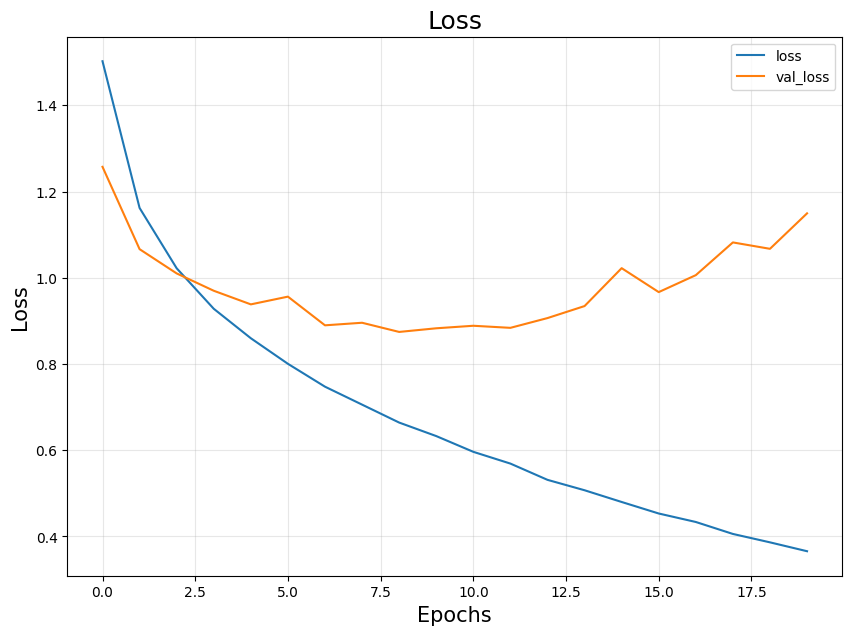

In [22]:
f = plt.figure(figsize=(10,7))
f.add_subplot()

#Adding Subplot
plt.plot(history.epoch, history.history['loss'], label = "loss") # Loss curve for training set
plt.plot(history.epoch, history.history['val_loss'], label = "val_loss") # Loss curve for validation set

plt.title("Loss",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()
plt.savefig("Loss_curve_cifar10.png")
plt.show()